In [ ]:
!pip install -q kagglehub tensorflow scikit-learn matplotlib seaborn

from google.colab import files
print("📂 Upload your kaggle.json")
files.upload()

import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
os.chmod("/root/.kaggle/kaggle.json", 600)


📂 Upload your kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
import kagglehub
import os
import shutil

# ✅ Download
kaggle_path = kagglehub.dataset_download("mohamedhanyyy/chest-ctscan-images")
source_data_path = os.path.join(kaggle_path, "Data")

# ✅ Copy to writable /content/ folder
writable_path = "/content/chest-ctscan"
shutil.copytree(source_data_path, writable_path, dirs_exist_ok=True)

# ✅ Rename long folder names
label_map = {
    "adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib": "adenocarcinoma",
    "large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa": "large.cell.carcinoma",
    "squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa": "squamous.cell.carcinoma",
    "normal": "normal"
}

for split in ["train", "valid"]:
    split_path = os.path.join(writable_path, split)
    for folder in os.listdir(split_path):
        old_path = os.path.join(split_path, folder)
        if os.path.isdir(old_path):
            new_name = label_map.get(folder, folder)
            new_path = os.path.join(split_path, new_name)
            if not os.path.exists(new_path):
                shutil.move(old_path, new_path)

print("✅ Data copied and cleaned at:", writable_path)


100%|██████████| 119M/119M [00:01<00:00, 69.9MB/s]

Extracting files...


✅ Data copied and cleaned at: /content/chest-ctscan


In [ ]:
train_dir = os.path.join(writable_path, "train")
val_dir   = os.path.join(writable_path, "valid")
test_dir  = os.path.join(writable_path, "test")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_dir = "/content/chest-ctscan/train"
val_dir   = "/content/chest-ctscan/valid"
test_dir  = "/content/chest-ctscan/test"

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_data   = datagen.flow_from_directory(val_dir,   target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_data  = datagen.flow_from_directory(test_dir,  target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

class_names = list(train_data.class_indices.keys())


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3349 - loss: 1.5562 - val_accuracy: 0.5694 - val_loss: 1.0177
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 977ms/step - accuracy: 0.6872 - loss: 0.8410 - val_accuracy: 0.7222 - val_loss: 0.7369
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 978ms/step - accuracy: 0.8054 - loss: 0.5683 - val_accuracy: 0.7778 - val_loss: 0.6020
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 931ms/step - accuracy: 0.8631 - loss: 0.3747 - val_accuracy: 0.7639 - val_loss: 0.5631
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 957ms/step - accuracy: 0.9148 - loss: 0.2482 - val_accuracy: 0.7361 - val_loss: 0.7043
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 915ms/step - accuracy: 0.9453 - loss: 0.1653 - val_accuracy: 0.7500 - val_loss: 0.5992
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 913ms/step - accuracy: 0.9570 - loss: 0.1518 - val_accuracy: 0.8056 - val_loss: 0.5990
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9500 - loss: 0.1123 - val_accuracy: 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 346ms/step
📋 Classification Report:
                         precision    recall  f1-score   support

         adenocarcinoma       0.62      0.17      0.26       120
   large.cell.carcinoma       0.34      0.86      0.49        51
                 normal       0.51      0.93      0.65        54
squamous.cell.carcinoma       0.70      0.42      0.53        90

               accuracy                           0.48       315
              macro avg       0.54      0.59      0.48       315
           weighted avg       0.58      0.48      0.44       315



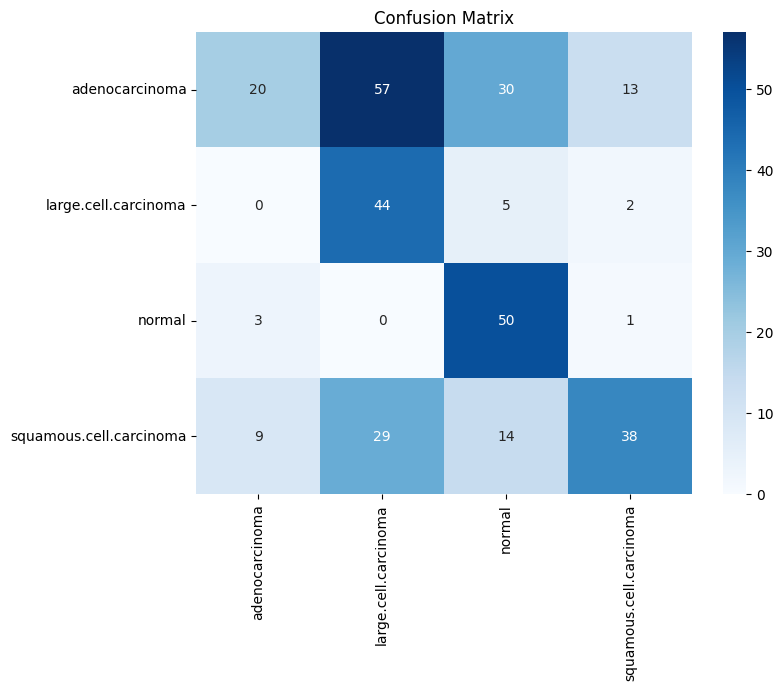

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_data.classes

print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


/tmp/ipython-input-2202414778.py:24: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


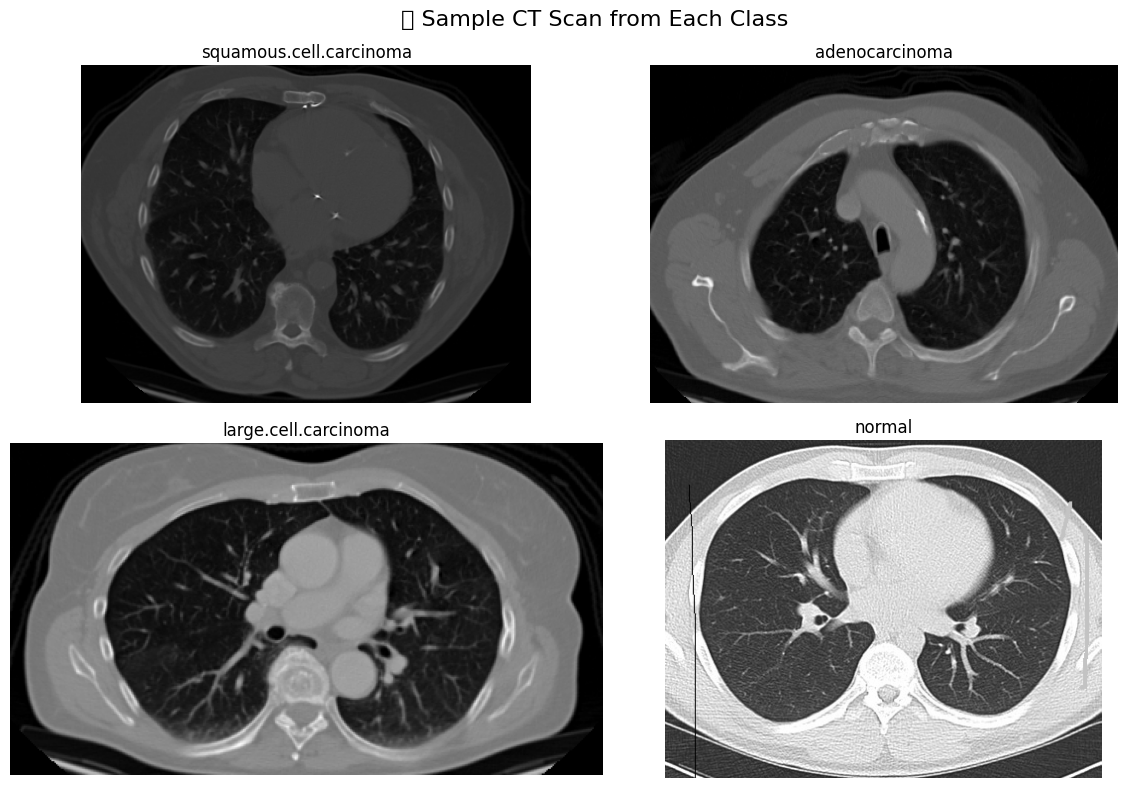

In [ ]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

train_dir = "/content/chest-ctscan/train"
classes = os.listdir(train_dir)

plt.figure(figsize=(12, 8))
for i, class_name in enumerate(classes):
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    sample_image = random.choice(image_files)
    image_path = os.path.join(class_path, sample_image)

    img = Image.open(image_path)

    plt.subplot(2, 2, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("🔍 Sample CT Scan from Each Class", fontsize=16)
plt.tight_layout()
plt.show()



In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files

print("📂 Upload a CT scan image (JPG/PNG)...")
uploaded = files.upload()

for fn in uploaded:
    img = image.load_img(fn, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    confidence = np.max(prediction)
    predicted_class = class_names[np.argmax(prediction)]

    print(f"\n🧠 Prediction: {predicted_class}")
    print(f"📈 Confidence: {confidence * 100:.2f}%")

    # Health Summary
    if predicted_class == "normal":
        print("🟢 Health Status: No signs of lung cancer.")
    elif confidence > 0.85:
        print(f"🔴 Severe: Strong signs of {predicted_class.upper()}")
    elif confidence > 0.6:
        print(f"🟠 Moderate: Possible {predicted_class.upper()}, recommend further tests.")
    else:
        print("🟡 Unclear: Please consult a specialist.")


📂 Upload a CT scan image (JPG/PNG)...


Saving Screenshot 2025-08-05 225228.png to Screenshot 2025-08-05 225228.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step

🧠 Prediction: large.cell.carcinoma
📈 Confidence: 99.62%
🔴 Severe: Strong signs of LARGE.CELL.CARCINOMA
